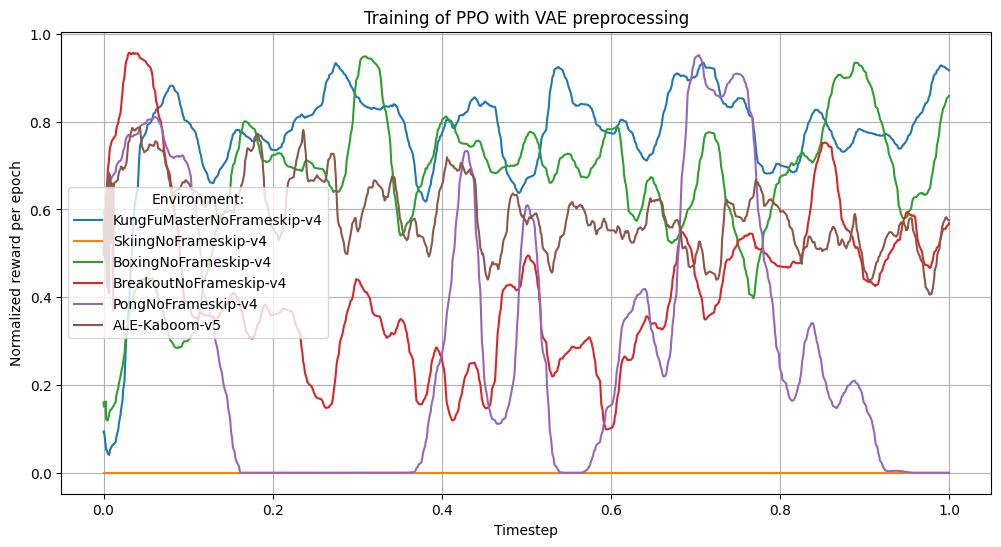

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler

dfs = []
scaler = MinMaxScaler()
for file in os.listdir("rl_training/"):
    if file.endswith(".csv"):
        df = pd.read_csv("rl_training/" + file)

        numeric_columns = df.select_dtypes(include=['number']).columns
        df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
        
        name = file.split('.')[0]

        df['File'] = name.split('_')[2]
        dfs.append(df)

# Concatenate the DataFrames
df = pd.concat(dfs)

# Apply a rolling window to smooth the data over 10 data points
window_size = 20
df['Rolling Min'] = df.groupby('File')['Value'].transform(lambda x: x.rolling(window=window_size, min_periods=1).min())
df['Rolling Max'] = df.groupby('File')['Value'].transform(lambda x: x.rolling(window=window_size, min_periods=1).max())
df['Smoothed Value'] = df.groupby('File')['Value'].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())

# Plotting using seaborn
plt.figure(figsize=(12, 6))
ax = plt.gca()
sns.lineplot(data=df, x='Step', y='Smoothed Value', hue='File', style='File', dashes=False)

plt.title('Training of PPO with VAE preprocessing')
plt.xlabel('Timestep')
plt.ylabel('Normalized reward per epoch')
plt.grid(True)
plt.legend(title='Environment:')

plt.savefig("VAE_preprocessing.pdf")
plt.show()
